# Question 1 & 2

In [1]:
# load the packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# find out the urls of different topics
topics = []
urlPublication = 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_characteranimation.htm'
urlGlobal = 'https://sitescrape.awh.durham.ac.uk/comp42315/'
urlPublicationTopic = ['https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_characteranimation.htm']  #publication urls of all topics
page = requests.get(urlPublication)
soup = BeautifulSoup(page.content, 'html.parser')
pTopics = soup.find_all('p', class_='TextOption')[1] # find the second p which contains topics

for aTopic in pTopics.find_all('a'):
    topic = aTopic['href']
    urlPublicationTopic.append(urlGlobal+topic) # patching url of each topic and save to list
print(urlPublicationTopic)

['https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_characteranimation.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_motionanalysis.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_interactionmodelling.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_biomedicalengineering.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_3dreconstruction.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_actionrecognition.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_surfacemodelling.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_crowdmodelling.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_facemodelling.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_virtualreality.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_robotics.htm', 'ht

In [3]:
# find out each url of papers from different topics
urlPubls = []  # url of each paper/publication
for url in urlPublicationTopic:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    divUrls = soup.find_all('div', class_='ImgIconPublicationDiv')
    for divUrl in divUrls:
        urlPbl = divUrl.find('a')['href'] # find out each url of publication
        urlPubls.append(urlGlobal + urlPbl) # patching url of each publication and save to list

urlPubls = list(set(urlPubls))  # Remove duplicate items

In [4]:
# find out all the relative information of publications in question 1 and 2
detailsAuthors = []
for url in urlPubls:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    h1Title = soup.find('h1').text # find out Title of each publication

    # find year
    h2LDOs = soup.find_all('h2')
    for h2LDO in h2LDOs: # year
        year = h2LDO.text[-4:] # year located in the last 4 position of text
        break

    # find citation
    divIfCitation = soup.find('div', style ='color:orange').text
    if divIfCitation.find('Citation') != -1 : # -1 means no 'Citation' was found, !=-1 means  'Citation' was found
        numCitation = int(divIfCitation[divIfCitation.rfind(':') + 2:-2]) # Removing colons and spaces then get the citation
    else:
        numCitation = None

    # find IF
    if divIfCitation.find('Impact Factor') != -1: # -1 means no 'Impact Factor' was found, !=-1 means  'Impact Factor' was found
        numIF = float(divIfCitation[divIfCitation.find(':')+2:divIfCitation.find('#')]) # like the citation
    else:
        numIF = None

    divStyles = soup.find_all('div', style="margin-left: var(--size-marginleft)")
    aLDOTexts =[]
    for divStyle in divStyles:
        aTexts = divStyle.find_all('a')
        for aText in aTexts:
            if aText.text:
                aLDOTexts.append(aText.text) # all the name of LDO items except the youtube
    numLDOs = len(aLDOTexts)

    iframeYtbs = soup.find_all('iframe') # Youtube appears in iframe
    if iframeYtbs != -1:
        numLDOs = numLDOs + len(iframeYtbs) # number of LDO items

    detailsAuthors.append([h1Title, numCitation, year, numIF, numLDOs])

print(detailsAuthors)

[['TSK Inference with Sparse Rule Bases', 6, '2016', None, 2], ['Unifying Person and Vehicle Re-identification', 11, '2020', 3.367, 2], ['NETIVAR: NETwork Information Visualization based on Augmented Reality', 1, '2018', None, 4], ['Simulating Multiple Character Interactions with Collaborative and Adversarial Goals', 112, '2012', 4.579, 7], ['Spoofing Detection on Hand Images Using Quality Assessment', 1, '2021', 2.757, 2], ['Stable Hand Pose Estimation under Tremor via Graph Neural Network', 31, '2021', None, 4], ['Finding Repetitive Patterns in 3D Human Motion Captured Data', 28, '2008', None, 2], ['Curvature-Based Sparse Rule Base Generation for Fuzzy Rule Interpolation', 4, '2019', None, 2], ['Validation of an Ergonomic Assessment Method using Kinect Data in Real Workplace Conditions', 45, '2017', 3.661, 2], ['Interactive Formation Control in Complex Environments', 61, '2014', 4.579, 4], ['A Quadruple Diffusion Convolutional Recurrent Network for Human Motion Prediction', 228, '202

In [5]:
# convert list to DataFrame
dfDetailsAuthors = pd.DataFrame(detailsAuthors,columns=['h1Title', 'numCitation', 'year', 'numIF', 'numLDOs'])
dfDetailsAuthors

,h1Title,numCitation,year,numIF,numLDOs
0,TSK Inference with Sparse Rule Bases,6.0,2016,NaN,2
1,Unifying Person and Vehicle Re-identification,11.0,2020,3.367,2
2,NETIVAR: NETwork Information Visualization bas...,1.0,2018,NaN,4
3,Simulating Multiple Character Interactions wit...,112.0,2012,4.579,7
4,Spoofing Detection on Hand Images Using Qualit...,1.0,2021,2.757,2
...,...,...,...,...,...
123,Denoising Diffusion Probabilistic Models for S...,NaN,2022,NaN,3
124,Simulating Interactions of Characters,1.0,2008,NaN,2
125,Resolving Occlusion for 3D Object Manipulation...,28.0,2018,NaN,4
126,Patient Assessment Assistant Using Augmented R...,10.0,2018,NaN,1


In [6]:
# Top 25 publication based on Citation  according to citation number year and IF in order
dfCitation = dfDetailsAuthors.sort_values(['numCitation','year','numIF'], ascending=False, na_position='last') # Priority is given to the most recent year of publication, and if the citation in the same year is the same then the impact factor is used as the ranking criterion.
dfCitation.head(25)

,h1Title,numCitation,year,numIF,numLDOs
10,A Quadruple Diffusion Convolutional Recurrent ...,228.0,2021,4.685,5
71,Interaction Patches for Multi-Character Animation,201.0,2008,5.414,10
11,Real-Time Posture Reconstruction for Microsoft...,150.0,2013,11.448,5
3,Simulating Multiple Character Interactions wit...,112.0,2012,4.579,7
116,Simulating Competitive Interactions using Sing...,112.0,2007,NaN,4
74,Simulating Interactions of Avatars in High Dim...,102.0,2008,NaN,7
21,Kinect Posture Reconstruction based on a Local...,98.0,2016,4.579,4
102,Interaction-based Human Activity Comparison,88.0,2020,4.579,5
22,Environment-aware Real-Time Crowd Control,79.0,2012,NaN,3
85,Real-time Physical Modelling of Character Move...,68.0,2012,NaN,4


In [7]:
# Top 25 publication based on  LDO items  according to number of LDO items,citation, year and IF in order
dfLDO = dfDetailsAuthors.sort_values(['numLDOs','numCitation','year','numIF'], ascending=False, na_position='last') # Priority is given to the most recent year of publication, and if the number of LDOs in the same year is the same then the impact factor is used as the ranking criterion.
dfLDO.head(25)

,h1Title,numCitation,year,numIF,numLDOs
71,Interaction Patches for Multi-Character Animation,201.0,2008,5.414,10
3,Simulating Multiple Character Interactions wit...,112.0,2012,4.579,7
74,Simulating Interactions of Avatars in High Dim...,102.0,2008,NaN,7
13,Resolving Hand-Object Occlusion for Mixed Real...,21.0,2020,1.020,7
69,DSPP: Deep Shape and Pose Priors of Humans,2.0,2019,NaN,6
29,Makeup Style Transfer on Low-quality Images wi...,1.0,2020,NaN,6
61,Foreground-aware Dense Depth Estimation for 36...,1.0,2020,NaN,6
27,360 Depth Estimation in the Wild - The Depth36...,NaN,2022,NaN,6
10,A Quadruple Diffusion Convolutional Recurrent ...,228.0,2021,4.685,5
11,Real-Time Posture Reconstruction for Microsoft...,150.0,2013,11.448,5


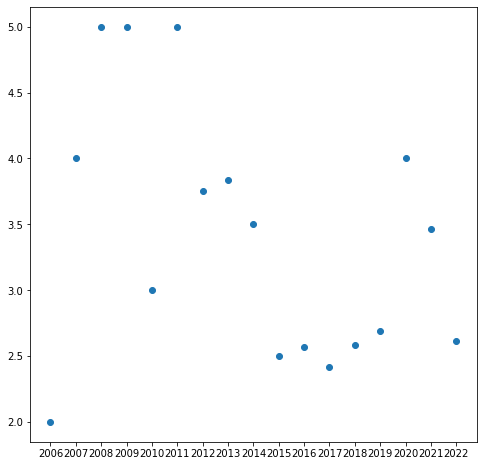

In [8]:
# plot the scatter
plt.figure(1,figsize=(8,8))
df_grouped = dfLDO.fillna(0).groupby('year')
avgNumLDOs = df_grouped.mean()
plt.scatter(avgNumLDOs.index, avgNumLDOs['numLDOs'])
plt.show()

# Question 3

In [9]:
# load the packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [10]:
# # Like Question 1&2, we find all the urls of different topics
topics = []
urlPublication = 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_characteranimation.htm'
urlGlobal = 'https://sitescrape.awh.durham.ac.uk/comp42315/'
urlPublicationTopic = ['https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_characteranimation.htm']  #publication urls of all topics
page = requests.get(urlPublication)
soup = BeautifulSoup(page.content, 'html.parser')
pTopics = soup.find_all('p', class_='TextOption')[1]

for aTopic in pTopics.find_all('a'):
    topic = aTopic['href']
    urlPublicationTopic.append(urlGlobal+topic)
print(urlPublicationTopic)

['https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_characteranimation.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_motionanalysis.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_interactionmodelling.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_biomedicalengineering.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_3dreconstruction.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_actionrecognition.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_surfacemodelling.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_crowdmodelling.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_facemodelling.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_virtualreality.htm', 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_robotics.htm', 'ht

In [11]:
# find the text of different topics
url = 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_characteranimation.htm'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

# find individual topic
pTopic = soup.find_all('p', class_='TextOption')[1].text
Topics = pTopic[pTopic.find(':') + 4:].split('/')  # topics in a list
print(Topics)

['Character Animation ', ' Motion Analysis ', ' Interaction Modelling ', ' Biomedical Engineering ', ' 3D Reconstruction ', ' Action Recognition ', ' Surface Modelling ', ' Crowd Modelling ', ' Face Modelling ', ' Virtual Reality ', ' Robotics ', ' Biometrics ', ' Hand and Gesture ', ' Computational Intelligence']


In [12]:
# match each pages and the topic
urlPblDetails=[]
indexTopic = 0
for url in urlPublicationTopic:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')

    # find url of individual paper on one page
    divUrlPbls = soup.find_all('div', class_='ImgIconPublicationDiv')
    for divUrlPbl in divUrlPbls:
        urlPblTextInd = divUrlPbl.find('a')['href'][:-4]
        urlPblDetails.append([urlPblTextInd,Topics[indexTopic].strip()]) # find out all the primary keys and topics
    indexTopic += 1

print(urlPblDetails)

[['pbl_cag2022reactive7098', 'Character Animation'], ['pbl_mig2022style717', 'Character Animation'], ['pbl_tvcg2021deeplearning8560', 'Character Animation'], ['pbl_tcsvt2021prediction7122', 'Character Animation'], ['pbl_cavw2019emotion5293', 'Character Animation'], ['pbl_mig2019dance3960', 'Character Animation'], ['pbl_ace2017dancedj2550', 'Character Animation'], ['pbl_d2at2017emotion1318', 'Character Animation'], ['pbl_siggraph2016dance4025', 'Character Animation'], ['pbl_hhm2016depth6053', 'Character Animation'], ['pbl_pg2015lattice663', 'Character Animation'], ['pbl_casa2014variation340', 'Character Animation'], ['pbl_pg2013topology5337', 'Character Animation'], ['pbl_cavw2013preparation8776', 'Character Animation'], ['pbl_casa2013preparation87', 'Character Animation'], ['pbl_tvcg2012interaction1595', 'Character Animation'], ['pbl_vrst2012physical3558', 'Character Animation'], ['pbl_patent2010interaction4886', 'Character Animation'], ['pbl_thesis2010interaction4848', 'Character Anim

In [13]:
# convert the list to DataFrame
dfPblTopics = pd.DataFrame(urlPblDetails, columns=['urlPblTextInd', 'Topic'])
print(dfPblTopics)

                    urlPblTextInd                       Topic
0         pbl_cag2022reactive7098         Character Animation
1             pbl_mig2022style717         Character Animation
2    pbl_tvcg2021deeplearning8560         Character Animation
3     pbl_tcsvt2021prediction7122         Character Animation
4         pbl_cavw2019emotion5293         Character Animation
..                            ...                         ...
177       pbl_tip2016feedback9430  Computational Intelligence
178    pbl_fuzz2016experience6764  Computational Intelligence
179        pbl_fuzz2016sparse4688  Computational Intelligence
180         pbl_ukci2016fuzzy5672  Computational Intelligence
181         pbl_ukci2015fuzzy3678  Computational Intelligence

[182 rows x 2 columns]


In [14]:
# find all individual url of each paper like Question 1 & 2
urlPbls = [] # url of each paper/publication
for url in urlPublicationTopic:
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    divUrls = soup.find_all('div', class_ = 'ImgIconPublicationDiv')
    for divUrl in divUrls:
        urlPbl = divUrl.find('a')['href']
        urlPbls.append(urlGlobal + urlPbl)

urlPbls = list(set(urlPbls)) #drop duplicates

In [15]:
# Find all the information of one publication, including urltext, title authors citation numbers and order of authors
detailsAuthors = []
for url in urlPbls:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    h1Title = soup.find('h1').text

# find year
    h2LDOs = soup.find_all('h2')
    for h2LDO in h2LDOs: # year
        year = h2LDO.text[-4:]
        break

    divIfCitation = soup.find('div', style ='color:orange').text
    if divIfCitation.find('Citation') != -1 : # -1 means no 'Citation' was found, !=-1 means  'Citation' was found
        numCitation = int(divIfCitation[divIfCitation.rfind(':') + 2:-2]) # remove colons and spaces
    else:
        numCitation = None

    # find IF
    if divIfCitation.find('Impact Factor') != -1: # -1 means no 'Impact Factor' was found, !=-1 means  'Impact Factor' was found
        numIF = float(divIfCitation[divIfCitation.find(':')+2:divIfCitation.find('#')])
    else:
        numIF = None

    divStyleTy = soup.find_all('div', style = 'display:block;min-width:280px;max-width:400px;float:left;text-align:left;overflow:hidden;margin-left:var(--size-marginleft);')[1]
    pType = divStyleTy.find('p').text
    PblType = pType[pType.find('-')+2:pType.find('AU')] # find the first dash and 'AU', TY always appears in the first one and followed by 'AU'

    if pType.find('PB') != -1: # if it can find 'PB', then try to find 'ER'
        if pType.find('ER'):
            Publisher = pType[pType.find('PB')+ 6: pType.find('ER')] # if it can find 'ER', slicing the contents before 'ER'
        else:
            Publisher = pType[pType.find('PB')+ 6: ] # no 'ER', slicing the last one
    else:
        Publisher = None

    divStyles = soup.find_all('div', style="margin-left: var(--size-marginleft)")
    aLDOTexts =[]
    for divStyle in divStyles:
        aTexts = divStyle.find_all('a')
        for aText in aTexts:
            if aText.text:
                aLDOTexts.append(aText.text)
    numLDOs = len(aLDOTexts) # number of the LDO items with titles

    iframeYtbs = soup.find_all('iframe')
    if iframeYtbs != -1:
        numLDOs = numLDOs + len(iframeYtbs) # number of the LDO items with youtube iframe

    authorStyles = soup.find('h2', style="text-align: center" ).find_all('a')
    orderAuthor = 0
    for authorStyle in authorStyles:
        urlPblTextInd = url[url.rfind('/')+1:-4] # the primary key of one observation
        Author = authorStyle.text # author
        orderAuthor += 1 # author order
        detailsAuthors.append([urlPblTextInd, h1Title, Author, numCitation, orderAuthor, PblType, year, numIF, Publisher, numLDOs])

print(detailsAuthors)

[['pbl_ukci2016fuzzy5672', 'TSK Inference with Sparse Rule Bases', 'Jie Li', 6, 1, 'CONF', '2016', None, 'Springer International Publishing', 2], ['pbl_ukci2016fuzzy5672', 'TSK Inference with Sparse Rule Bases', 'Yanpeng Qu', 6, 2, 'CONF', '2016', None, 'Springer International Publishing', 2], ['pbl_ukci2016fuzzy5672', 'TSK Inference with Sparse Rule Bases', 'Hubert P. H. Shum', 6, 3, 'CONF', '2016', None, 'Springer International Publishing', 2], ['pbl_ukci2016fuzzy5672', 'TSK Inference with Sparse Rule Bases', 'Longzhi Yang', 6, 4, 'CONF', '2016', None, 'Springer International Publishing', 2], ['pbl_access2020reidentification3102', 'Unifying Person and Vehicle Re-identification', 'Daniel Organisciak', 11, 1, 'JOUR', '2020', 3.367, 'IEEE', 2], ['pbl_access2020reidentification3102', 'Unifying Person and Vehicle Re-identification', 'Dimitrios Sakkos', 11, 2, 'JOUR', '2020', 3.367, 'IEEE', 2], ['pbl_access2020reidentification3102', 'Unifying Person and Vehicle Re-identification', 'Edmond 

In [16]:
# convert the list to DataFrame
dfDetailsAuthors = pd.DataFrame(detailsAuthors,columns=['urlPblTextInd', 'h1Title', 'Author', 'numCitation', 'orderAuthor','PblType', 'year', 'numIF', 'Publisher','numLDOs'])
dfDetailsAuthors.head()

,urlPblTextInd,h1Title,Author,numCitation,orderAuthor,PblType,year,numIF,Publisher,numLDOs
0,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Jie Li,6.0,1,CONF,2016,NaN,Springer International Publishing,2
1,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Yanpeng Qu,6.0,2,CONF,2016,NaN,Springer International Publishing,2
2,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Hubert P. H. Shum,6.0,3,CONF,2016,NaN,Springer International Publishing,2
3,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Longzhi Yang,6.0,4,CONF,2016,NaN,Springer International Publishing,2
4,pbl_access2020reidentification3102,Unifying Person and Vehicle Re-identification,Daniel Organisciak,11.0,1,JOUR,2020,3.367,IEEE,2


In [17]:
# the number of citation based on Author
numCitationAuthor = dfDetailsAuthors.groupby('Author')['numCitation'].sum().sort_values(ascending=False)
numCitationAuthor = pd.DataFrame(numCitationAuthor)
numCitationAuthor.head(10) # highly cited authors

,numCitation
Author,
Hubert P. H. Shum,3266.0
Edmond S. L. Ho,1140.0
Taku Komura,1052.0
Howard Leung,655.0
Shuntaro Yamazaki,527.0
Qianhui Men,369.0
Shigeo Morishima,261.0
Nauman Aslam,260.0
Longzhi Yang,236.0


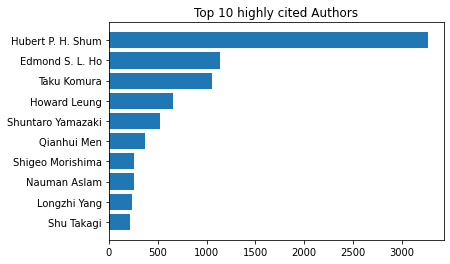

In [18]:
numCtAt = numCitationAuthor.head(10)
numCtAt_sorted = numCtAt.sort_values(by='numCitation',ascending=True)
plt.barh(numCtAt_sorted.index, numCtAt_sorted['numCitation'])
plt.title('Top 10 highly cited Authors')
plt.show()

In [19]:
# Merge two DataFrame to match the publication information and the topic of each publication
dfDetailsPubsTopicAuthors = pd.merge(dfDetailsAuthors, dfPblTopics, on='urlPblTextInd',how='left')
dfDetailsPubsTopicAuthors

,urlPblTextInd,h1Title,Author,numCitation,orderAuthor,PblType,year,numIF,Publisher,numLDOs,Topic
0,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Jie Li,6.0,1,CONF,2016,NaN,Springer International Publishing,2,Computational Intelligence
1,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Yanpeng Qu,6.0,2,CONF,2016,NaN,Springer International Publishing,2,Computational Intelligence
2,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Hubert P. H. Shum,6.0,3,CONF,2016,NaN,Springer International Publishing,2,Computational Intelligence
3,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Longzhi Yang,6.0,4,CONF,2016,NaN,Springer International Publishing,2,Computational Intelligence
4,pbl_access2020reidentification3102,Unifying Person and Vehicle Re-identification,Daniel Organisciak,11.0,1,JOUR,2020,3.367,IEEE,2,Biometrics
...,...,...,...,...,...,...,...,...,...,...,...
679,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Jie Li,14.0,2,CONF,2016,NaN,IEEE,2,Computational Intelligence
680,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Martin Wonders,14.0,3,CONF,2016,NaN,IEEE,2,Computational Intelligence
681,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Fei Chao,14.0,4,CONF,2016,NaN,IEEE,2,Computational Intelligence
682,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Hubert P. H. Shum,14.0,5,CONF,2016,NaN,IEEE,2,Computational Intelligence


In [20]:
# 3a Sort the research topics related to the publications of the top ten 'highly cited' authors
tpCt = dfDetailsPubsTopicAuthors[dfDetailsPubsTopicAuthors['Author'].isin(['Hubert P. H. Shum', 'Edmond S. L. Ho', 'Taku Komura', 'Howard Leung', 'Shuntaro Yamazaki', 'Qianhui Men','Shigeo Morishima', 'Nauman Aslam', 'Longzhi Yang', 'Shu Takagi'])].drop_duplicates(subset=['h1Title']).groupby(['Topic'])['numCitation'].sum().sort_values(ascending=False)
print(tpCt)

Topic
Character Animation           1183.0
3D Reconstruction              494.0
Motion Analysis                420.0
Action Recognition             256.0
Crowd Modelling                228.0
Virtual Reality                176.0
Face Modelling                 116.0
Interaction Modelling          112.0
Computational Intelligence      88.0
Biomedical Engineering          81.0
Biometrics                      49.0
Robotics                        41.0
Surface Modelling               22.0
Name: numCitation, dtype: float64


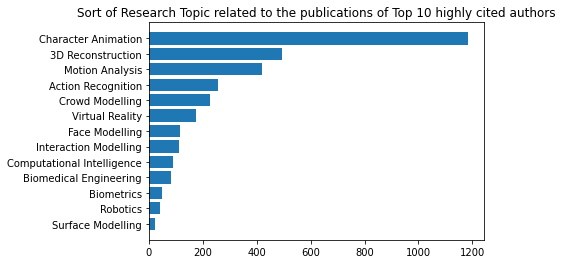

In [21]:
# 3a_1 Sort the Research Topic related to the publications of Top 10 highly cited authors
tpCt = tpCt.to_frame()
tpCt_sorted = tpCt.sort_values(by='numCitation',ascending=True)
plt.barh(tpCt_sorted.index, tpCt_sorted['numCitation'])
plt.title('Sort of Research Topic related to the publications of Top 10 highly cited authors')
plt.show()

In [22]:
# Analyse which authors collaborate (or appear) as co-authors in the publications based on the research topics.
# Calculate the number of occurrences of the data in column urlPblTextInd
PblTextInd_counts = dfDetailsPubsTopicAuthors['urlPblTextInd'].value_counts()
# Find the data that appears only once in column urlPblTextInd
PblTextInd_remove = PblTextInd_counts[PblTextInd_counts == 1].index
# Delete the data that appears only once, the rest is with primary author and co-author
dfAuthors = dfDetailsPubsTopicAuthors[~dfDetailsPubsTopicAuthors['urlPblTextInd'].isin(PblTextInd_remove)]
dfAuthors

,urlPblTextInd,h1Title,Author,numCitation,orderAuthor,PblType,year,numIF,Publisher,numLDOs,Topic
0,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Jie Li,6.0,1,CONF,2016,NaN,Springer International Publishing,2,Computational Intelligence
1,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Yanpeng Qu,6.0,2,CONF,2016,NaN,Springer International Publishing,2,Computational Intelligence
2,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Hubert P. H. Shum,6.0,3,CONF,2016,NaN,Springer International Publishing,2,Computational Intelligence
3,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Longzhi Yang,6.0,4,CONF,2016,NaN,Springer International Publishing,2,Computational Intelligence
4,pbl_access2020reidentification3102,Unifying Person and Vehicle Re-identification,Daniel Organisciak,11.0,1,JOUR,2020,3.367,IEEE,2,Biometrics
...,...,...,...,...,...,...,...,...,...,...,...
679,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Jie Li,14.0,2,CONF,2016,NaN,IEEE,2,Computational Intelligence
680,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Martin Wonders,14.0,3,CONF,2016,NaN,IEEE,2,Computational Intelligence
681,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Fei Chao,14.0,4,CONF,2016,NaN,IEEE,2,Computational Intelligence
682,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Hubert P. H. Shum,14.0,5,CONF,2016,NaN,IEEE,2,Computational Intelligence


In [23]:
# Filter the ten most highly cited authors and group them according to topic, remove the authors with author order 1, and make all the rest as co-authors
dfCoAuthors = dfAuthors[(dfAuthors['orderAuthor'] != 1) & (dfAuthors['Author'].isin(['Hubert P. H. Shum', 'Edmond S. L. Ho', 'Taku Komura', 'Howard Leung', 'Shuntaro Yamazaki', 'Qianhui Men','Shigeo Morishima', 'Nauman Aslam', 'Longzhi Yang', 'Shu Takagi']))].groupby(['Topic'])
dfCoAuthors['Author'].apply(lambda x: x.drop_duplicates().tolist()).apply(lambda x: ','.join(x)).reset_index()

,Topic,Author
0,3D Reconstruction,"Edmond S. L. Ho,Shu Takagi,Hubert P. H. Shum,S..."
1,Action Recognition,"Howard Leung,Taku Komura,Hubert P. H. Shum,Nau..."
2,Biomedical Engineering,"Hubert P. H. Shum,Edmond S. L. Ho,Nauman Aslam..."
3,Biometrics,"Edmond S. L. Ho,Nauman Aslam,Hubert P. H. Shum"
4,Character Animation,"Taku Komura,Shuntaro Yamazaki,Edmond S. L. Ho,..."
5,Computational Intelligence,"Hubert P. H. Shum,Longzhi Yang"
6,Crowd Modelling,"Hubert P. H. Shum,Taku Komura,Edmond S. L. Ho,..."
7,Face Modelling,"Hubert P. H. Shum,Edmond S. L. Ho,Nauman Aslam..."
8,Hand and Gesture,"Hubert P. H. Shum,Shigeo Morishima"
9,Interaction Modelling,"Taku Komura,Shuntaro Yamazaki,Qianhui Men,Shig..."


In [24]:
# Suggest the most popular topics where the authors collaborate with each other.
# The most popular topic is the one with the highest number of author appearances, and the number of author citations should be in the top 10, all 3a questions are base on the top ten highly cited authors
dfCoAuthors = dfAuthors[dfAuthors['Author'].isin(['Hubert P. H. Shum', 'Edmond S. L. Ho', 'Taku Komura', 'Howard Leung', 'Shuntaro Yamazaki', 'Qianhui Men','Shigeo Morishima', 'Nauman Aslam', 'Longzhi Yang', 'Shu Takagi'])].groupby(['Topic'])['Author'].apply(lambda x: x.value_counts()).reset_index()

numAuthorsCo = dfCoAuthors.groupby(['Topic']).sum()
numAuthorsCo.sort_values('Author', ascending=False)

,Author
Topic,
Character Animation,62
Interaction Modelling,48
Motion Analysis,41
Action Recognition,36
Biomedical Engineering,32
3D Reconstruction,31
Surface Modelling,26
Crowd Modelling,19
Virtual Reality,19


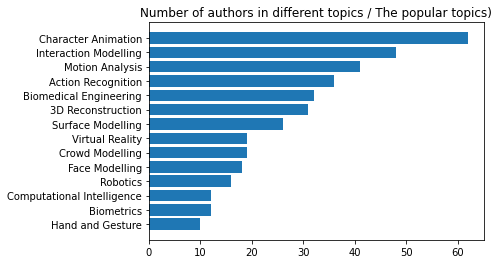

In [25]:
numAuthorsCo_sorted = numAuthorsCo.sort_values(by='Author',ascending=True)
plt.barh(numAuthorsCo_sorted.index, numAuthorsCo_sorted['Author'])
plt.title('Number of authors in different topics / The popular topics)')
plt.show()

In [26]:
# Analyse the relationship between the features of the publication and the "citation" count.
# IF classification processing based on the segmentation provided on the web
dfDetailsPubsTopicAuthors['numIF'] = dfDetailsPubsTopicAuthors['numIF'].fillna(0)
bins = [0, 1, 2, 3, 4, 5, 8, 12]  # max numIF is less than 12
labels = ['0+', '1+', '2+', '3+', '4+', '5+', '8+']  
dfDetailsPubsTopicAuthors['IF'] = pd.cut(dfDetailsPubsTopicAuthors['numIF'], bins=bins, labels=labels, right=False)
dfDetailsPubsTopicAuthors

,urlPblTextInd,h1Title,Author,numCitation,orderAuthor,PblType,year,numIF,Publisher,numLDOs,Topic,IF
0,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Jie Li,6.0,1,CONF,2016,0.000,Springer International Publishing,2,Computational Intelligence,0+
1,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Yanpeng Qu,6.0,2,CONF,2016,0.000,Springer International Publishing,2,Computational Intelligence,0+
2,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Hubert P. H. Shum,6.0,3,CONF,2016,0.000,Springer International Publishing,2,Computational Intelligence,0+
3,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Longzhi Yang,6.0,4,CONF,2016,0.000,Springer International Publishing,2,Computational Intelligence,0+
4,pbl_access2020reidentification3102,Unifying Person and Vehicle Re-identification,Daniel Organisciak,11.0,1,JOUR,2020,3.367,IEEE,2,Biometrics,3+
...,...,...,...,...,...,...,...,...,...,...,...,...
679,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Jie Li,14.0,2,CONF,2016,0.000,IEEE,2,Computational Intelligence,0+
680,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Martin Wonders,14.0,3,CONF,2016,0.000,IEEE,2,Computational Intelligence,0+
681,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Fei Chao,14.0,4,CONF,2016,0.000,IEEE,2,Computational Intelligence,0+
682,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Hubert P. H. Shum,14.0,5,CONF,2016,0.000,IEEE,2,Computational Intelligence,0+


In [27]:
# LDO amount classification processing
dfDetailsPubsTopicAuthors['numLDOs'] = dfDetailsPubsTopicAuthors['numLDOs'].fillna(0)
bins = [0, 3, 6, 9, 12]  # max LDO number is less than 12
labels = ['0+', '3+', '6+', '9+']
dfDetailsPubsTopicAuthors['LDO'] = pd.cut(dfDetailsPubsTopicAuthors['numLDOs'], bins=bins, labels=labels, right=False)
dfDetailsPubsTopicAuthors

,urlPblTextInd,h1Title,Author,numCitation,orderAuthor,PblType,year,numIF,Publisher,numLDOs,Topic,IF,LDO
0,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Jie Li,6.0,1,CONF,2016,0.000,Springer International Publishing,2,Computational Intelligence,0+,0+
1,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Yanpeng Qu,6.0,2,CONF,2016,0.000,Springer International Publishing,2,Computational Intelligence,0+,0+
2,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Hubert P. H. Shum,6.0,3,CONF,2016,0.000,Springer International Publishing,2,Computational Intelligence,0+,0+
3,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,Longzhi Yang,6.0,4,CONF,2016,0.000,Springer International Publishing,2,Computational Intelligence,0+,0+
4,pbl_access2020reidentification3102,Unifying Person and Vehicle Re-identification,Daniel Organisciak,11.0,1,JOUR,2020,3.367,IEEE,2,Biometrics,3+,0+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Jie Li,14.0,2,CONF,2016,0.000,IEEE,2,Computational Intelligence,0+,0+
680,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Martin Wonders,14.0,3,CONF,2016,0.000,IEEE,2,Computational Intelligence,0+,0+
681,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Fei Chao,14.0,4,CONF,2016,0.000,IEEE,2,Computational Intelligence,0+,0+
682,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,Hubert P. H. Shum,14.0,5,CONF,2016,0.000,IEEE,2,Computational Intelligence,0+,0+


In [28]:
dfDetailsPubsTopicAuthors1 = dfDetailsPubsTopicAuthors # For debugging purposes, so a new dataframe is generated here

# count the number of authors in each publication
numAuthorGrouped = dfDetailsPubsTopicAuthors1.groupby(['urlPblTextInd','Topic']).agg({'numCitation':'count'}).reset_index()
dfnumAuthorGrouped = dfDetailsPubsTopicAuthors1.merge(numAuthorGrouped, on=['urlPblTextInd','Topic'], how='left')
dfDetailsPubsTopicAuthors1 = dfnumAuthorGrouped[['urlPblTextInd','h1Title','numCitation_x','PblType','year','numIF','Publisher','numLDOs','IF','LDO','numCitation_y','Topic']]
dfDetailsPubsTopicAuthors1.rename(columns={'numCitation_x':'numCitation','numCitation_y':'numAuthors'}, inplace=True) # rename the columns
dfDetailsPubsTopicAuthors1

,urlPblTextInd,h1Title,numCitation,PblType,year,numIF,Publisher,numLDOs,IF,LDO,numAuthors,Topic
0,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,6.0,CONF,2016,0.000,Springer International Publishing,2,0+,0+,4,Computational Intelligence
1,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,6.0,CONF,2016,0.000,Springer International Publishing,2,0+,0+,4,Computational Intelligence
2,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,6.0,CONF,2016,0.000,Springer International Publishing,2,0+,0+,4,Computational Intelligence
3,pbl_ukci2016fuzzy5672,TSK Inference with Sparse Rule Bases,6.0,CONF,2016,0.000,Springer International Publishing,2,0+,0+,4,Computational Intelligence
4,pbl_access2020reidentification3102,Unifying Person and Vehicle Re-identification,11.0,JOUR,2020,3.367,IEEE,2,3+,0+,5,Biometrics
...,...,...,...,...,...,...,...,...,...,...,...,...
679,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,14.0,CONF,2016,0.000,IEEE,2,0+,0+,6,Computational Intelligence
680,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,14.0,CONF,2016,0.000,IEEE,2,0+,0+,6,Computational Intelligence
681,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,14.0,CONF,2016,0.000,IEEE,2,0+,0+,6,Computational Intelligence
682,pbl_fuzz2016sparse4688,Towards Sparse Rule Base Generation for Fuzzy ...,14.0,CONF,2016,0.000,IEEE,2,0+,0+,6,Computational Intelligence


In [29]:
# Select features
dfDetailsPubsTopicNumAuthors1 = dfDetailsPubsTopicAuthors1[['urlPblTextInd', 'numCitation', 'PblType', 'year', 'Publisher', 'Topic', 'IF', 'numAuthors','LDO']]
dfDetailsPubsTopicNumAuthors1 = dfDetailsPubsTopicNumAuthors1.drop_duplicates(subset=['urlPblTextInd', 'Topic'])
dfDetailsPubsTopicNumAuthors1

,urlPblTextInd,numCitation,PblType,year,Publisher,Topic,IF,numAuthors,LDO
0,pbl_ukci2016fuzzy5672,6.0,CONF,2016,Springer International Publishing,Computational Intelligence,0+,4,0+
4,pbl_access2020reidentification3102,11.0,JOUR,2020,IEEE,Biometrics,3+,5,0+
9,pbl_skima2018network7004,1.0,CONF,2018,IEEE,Virtual Reality,0+,4,3+
13,pbl_tvcg2012interaction1595,112.0,JOUR,2012,IEEE,Character Animation,4+,3,6+
14,pbl_tvcg2012interaction1595,112.0,JOUR,2012,IEEE,Interaction Modelling,4+,3,6+
...,...,...,...,...,...,...,...,...,...
664,pbl_vrst2018hand6221,28.0,CONF,2018,ACM,Virtual Reality,0+,3,3+
665,pbl_vrst2018hand6221,28.0,CONF,2018,ACM,Hand and Gesture,0+,3,3+
670,pbl_hwb2018augmented2822,10.0,CONF,2018,None,Face Modelling,0+,4,0+
671,pbl_hwb2018augmented2822,10.0,CONF,2018,None,Virtual Reality,0+,4,0+


In [30]:
# ANOVA
model = ols('numCitation ~ PblType + year + Publisher  + Topic + IF + numAuthors + LDO', data=dfDetailsPubsTopicNumAuthors1)
data = model.fit()
print(anova_lm(data))

              df        sum_sq      mean_sq          F        PR(>F)
PblType      5.0  14149.942189  2829.988438   5.465420  2.465072e-04
year        16.0  63493.211369  3968.325711   7.663836  3.128471e-10
Publisher   17.0  44275.691340  2604.452432   5.029853  4.683983e-07
Topic       13.0  19391.630725  1491.663902   2.880778  2.063617e-03
IF           6.0  13163.370895  2193.895149   4.236964  1.014414e-03
LDO          3.0  22682.207464  7560.735821  14.601684  1.458687e-07
numAuthors   1.0    304.317395   304.317395   0.587713  4.457435e-01
Residual    74.0  38317.119113   517.798907        NaN           NaN


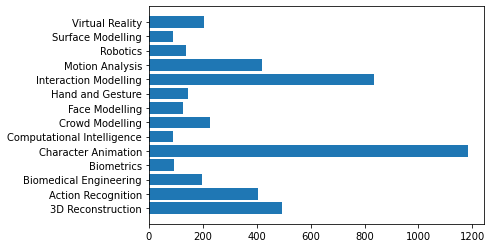

In [31]:
# plot the bar chart based on citation and the features
TopicCitation = dfDetailsPubsTopicNumAuthors1.groupby('Topic')['numCitation'].sum()
plt.barh(TopicCitation.index, TopicCitation)
plt.show()

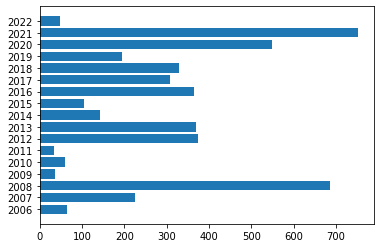

In [32]:
# plot the bar chart based on citation and the features
yearCitation = dfDetailsPubsTopicNumAuthors1.groupby('year')['numCitation'].sum()
plt.barh(yearCitation.index, yearCitation)
plt.show()

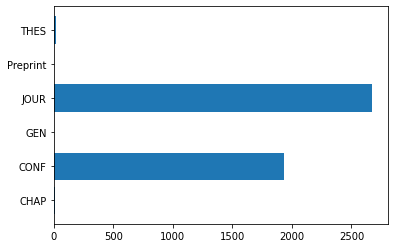

In [33]:
# plot the bar chart based on citation and the features
PTyCitation = dfDetailsPubsTopicNumAuthors1.groupby('PblType')['numCitation'].sum()
plt.barh(PTyCitation.index, PTyCitation)
plt.show()

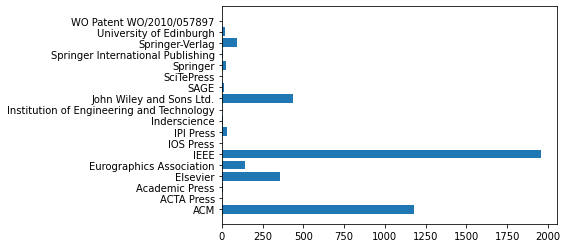

In [34]:
# plot the bar chart based on citation and the features
PublisherCitation = dfDetailsPubsTopicNumAuthors1.groupby('Publisher')['numCitation'].sum()
plt.barh(PublisherCitation.index, PublisherCitation)
plt.show()

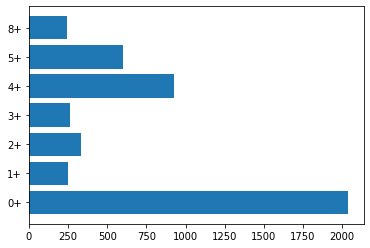

In [35]:
# plot the bar chart based on citation and the features
IFCitation = dfDetailsPubsTopicNumAuthors1.groupby('IF')['numCitation'].sum()
plt.barh(IFCitation.index, IFCitation)
plt.show()

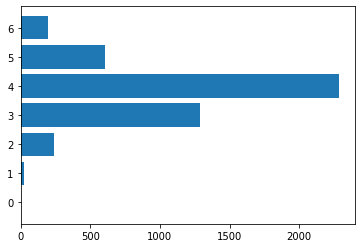

In [36]:
# plot the bar chart based on citation and the features
numAuthorsCitation = dfDetailsPubsTopicNumAuthors1.groupby('numAuthors')['numCitation'].sum()
plt.barh(numAuthorsCitation.index, numAuthorsCitation)
plt.show()

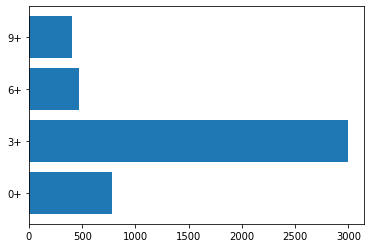

In [37]:
# plot the bar chart based on citation and the features
LDOCitation = dfDetailsPubsTopicNumAuthors1.groupby('LDO')['numCitation'].sum()
plt.barh(LDOCitation.index, LDOCitation)
plt.show()

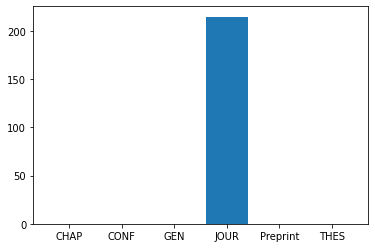

In [38]:
# 3c select IF and venues, drop duplicates and process the na value
dfIfPblType = dfDetailsAuthors[['urlPblTextInd', 'numIF', 'PblType']].drop_duplicates().fillna(0)
dfIfPblType = dfIfPblType.groupby('PblType')['numIF'].sum().to_frame() # sum of IF
plt.bar(dfIfPblType.index, dfIfPblType['numIF'])
plt.show()

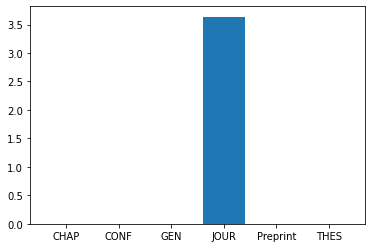

In [39]:
dfIfPblType = dfDetailsAuthors[['urlPblTextInd', 'numIF', 'PblType']].drop_duplicates().fillna(0)
dfIfPblType = dfIfPblType.groupby('PblType')['numIF'].mean().to_frame() # mean of IF
plt.bar(dfIfPblType.index, dfIfPblType['numIF'])
plt.show()

# Q4 Covid

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.estimators import TreeSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.metrics.metrics import correlation_score, log_likelihood_score, structure_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% ! important; }<style>"))
from sklearn.model_selection import train_test_split
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [41]:
covid = pd.read_csv('covid.csv',sep = ',', header=0)
covid = covid.drop('id', axis=1)
covid.head(20)

,headache,lossOfSmell,musclePain,cough,soreThroat,chestPain,fever,hoarseness,lossOfAppetite,diarrhea,fatigue,confusion,shortnessOfBreath,AbdominalPain,level
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,2
2,1,1,0,0,1,1,0,0,1,1,0,0,0,0,3
3,1,1,0,1,0,1,1,1,0,1,1,0,0,0,4
4,1,1,1,1,1,1,1,1,1,0,1,1,0,0,5
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6
6,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0
7,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0
8,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
9,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0


## Tree-Augmented Naive Bayes Network

In [42]:
training_data, testing_data = train_test_split(covid, test_size=0.2, random_state=20)

In [43]:
# learn graph structure
est = TreeSearch(training_data, root_node="headache")
dag = est.estimate(estimator_type="tan", class_node="level")

Building tree:   0%|          | 0/105.0 [00:00<?, ?it/s]

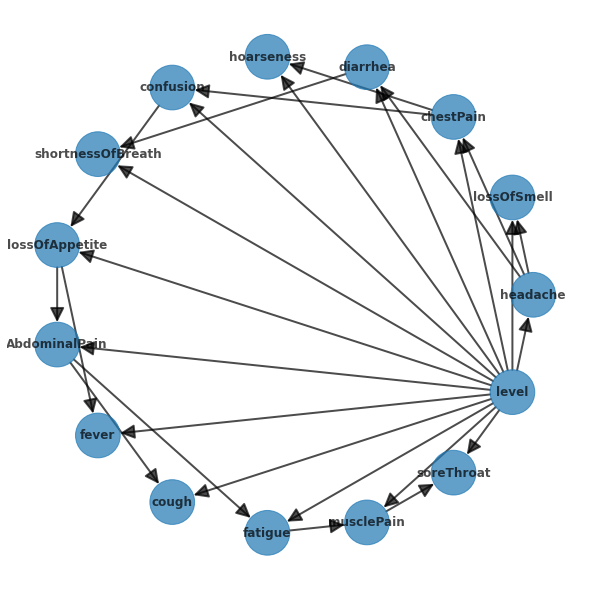

In [44]:
plt.figure(3,figsize=(8,8))

G = nx.DiGraph()
G.add_edges_from(dag.edges)
G.add_nodes_from(dag.nodes)
pos = nx.circular_layout(G)
nx.draw(G,
        pos=pos,
        with_labels=True,
        node_size=[2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000],
        arrowsize=30,
        alpha=0.7,
        font_weight="bold",
        width=2.0)  # Draw the original graph

plt.show()

In [45]:
model = BayesianNetwork(dag)

model.fit(data=training_data, estimator=BayesianEstimator, prior_type='BDeu')

model.get_cpds()

[<TabularCPD representing P(headache:2 | level:7) at 0x7fdd9baeddc0>,
 <TabularCPD representing P(lossOfSmell:2 | headache:2, level:7) at 0x7fdd9baed580>,
 <TabularCPD representing P(chestPain:2 | headache:2, level:7) at 0x7fdd9baedee0>,
 <TabularCPD representing P(diarrhea:2 | headache:2, level:7) at 0x7fdd9baed430>,
 <TabularCPD representing P(hoarseness:2 | chestPain:2, level:7) at 0x7fdd9baedbe0>,
 <TabularCPD representing P(confusion:2 | chestPain:2, level:7) at 0x7fdd9baed9d0>,
 <TabularCPD representing P(shortnessOfBreath:2 | diarrhea:2, level:7) at 0x7fdd9baed790>,
 <TabularCPD representing P(lossOfAppetite:2 | confusion:2, level:7) at 0x7fdd9baed760>,
 <TabularCPD representing P(AbdominalPain:2 | level:7, lossOfAppetite:2) at 0x7fdd9baeda60>,
 <TabularCPD representing P(fever:2 | level:7, lossOfAppetite:2) at 0x7fdd9baed850>,
 <TabularCPD representing P(cough:2 | AbdominalPain:2, level:7) at 0x7fdd9baedf70>,
 <TabularCPD representing P(fatigue:2 | AbdominalPain:2, level:7) at 

In [46]:
accuracy_dict = {}

for column in testing_data:
    predict_data = testing_data.copy()
    predict_data.drop(column, axis=1, inplace=True)
    y_pred = model.predict(predict_data)

    accuracy = accuracy_score(testing_data[column], y_pred)

    print(f'{column} Accuracy score: {accuracy}')

    accuracy_dict[column] = accuracy

  0%|          | 0/7700 [00:00<?, ?it/s]

headache Accuracy score: 0.71155


  0%|          | 0/7665 [00:00<?, ?it/s]

lossOfSmell Accuracy score: 0.713025


  0%|          | 0/7665 [00:00<?, ?it/s]

musclePain Accuracy score: 0.712075


  0%|          | 0/7700 [00:00<?, ?it/s]

cough Accuracy score: 0.715


  0%|          | 0/7724 [00:00<?, ?it/s]

soreThroat Accuracy score: 0.7116


  0%|          | 0/7639 [00:00<?, ?it/s]

chestPain Accuracy score: 0.713675


  0%|          | 0/7691 [00:00<?, ?it/s]

fever Accuracy score: 0.714125


  0%|          | 0/7693 [00:00<?, ?it/s]

hoarseness Accuracy score: 0.714225


  0%|          | 0/7678 [00:00<?, ?it/s]

lossOfAppetite Accuracy score: 0.71385


  0%|          | 0/7714 [00:00<?, ?it/s]

diarrhea Accuracy score: 0.71395


  0%|          | 0/7702 [00:00<?, ?it/s]

fatigue Accuracy score: 0.7121


  0%|          | 0/7663 [00:00<?, ?it/s]

confusion Accuracy score: 0.7141


  0%|          | 0/7670 [00:00<?, ?it/s]

shortnessOfBreath Accuracy score: 0.714425


  0%|          | 0/7703 [00:00<?, ?it/s]

AbdominalPain Accuracy score: 0.714475


  0%|          | 0/12300 [00:00<?, ?it/s]

level Accuracy score: 0.999875


In [47]:
a = 0
for v in accuracy_dict.values():
    a += v

accuracy_dict['Average'] = a / len(accuracy_dict.keys())

accuracy_dict

{'headache': 0.71155,
 'lossOfSmell': 0.713025,
 'musclePain': 0.712075,
 'cough': 0.715,
 'soreThroat': 0.7116,
 'chestPain': 0.713675,
 'fever': 0.714125,
 'hoarseness': 0.714225,
 'lossOfAppetite': 0.71385,
 'diarrhea': 0.71395,
 'fatigue': 0.7121,
 'confusion': 0.7141,
 'shortnessOfBreath': 0.714425,
 'AbdominalPain': 0.714475,
 'level': 0.999875,
 'Average': 0.7325366666666666}

In [48]:
f1 = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=f1_score, return_summary=False)
acc = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=accuracy_score, return_summary=False)
pr = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=precision_score, return_summary=False)
recall = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=recall_score, return_summary=False)
ls = log_likelihood_score(model=model, data=testing_data)
ss = structure_score(model=model, data=testing_data, scoring_method='bdeu')


print(f'F1 score: {f1}')
print(f'Accuracy score: {acc}')
print(f'Precision score: {pr}')
print(f'Recall score: {recall}')
print(f'Log-likilihood score: {ls}')
print(f'Strcture score: {ss}')

F1 score: 0.0
Accuracy score: 0.9047619047619048
Precision score: 0.0
Recall score: 0.0
Log-likilihood score: -280736.825937617
Strcture score: -281193.40408982773


### Conditional Probability Table (CPT)

In [49]:
print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd * 100, '\n')

Check model: True

CPT of headache:
+-------------+-------------------+-----+----------------------+
| level       | level(0)          | ... | level(6)             |
+-------------+-------------------+-----+----------------------+
| headache(0) | 49.90413870386137 | ... | 0.003129067788124562 |
+-------------+-------------------+-----+----------------------+
| headache(1) | 50.09586129613864 | ... | 99.99687093221186    |
+-------------+-------------------+-----+----------------------+ 

CPT of lossOfSmell:
+----------------+-----+-----------------------+
| headache       | ... | headache(1)           |
+----------------+-----+-----------------------+
| level          | ... | level(6)              |
+----------------+-----+-----------------------+
| lossOfSmell(0) | ... | 0.0015645828509202877 |
+----------------+-----+-----------------------+
| lossOfSmell(1) | ... | 99.9984354171491      |
+----------------+-----+-----------------------+ 

CPT of chestPain:
+--------------+----------

## Complex Bayesian Network

In [50]:
# We use train-test-split method to create training and test datasets.
training_data, testing_data = train_test_split(covid, test_size=0.2, random_state=20)
hc = HillClimbSearch(data=training_data)
estimate = hc.estimate(scoring_method='k2score')


  0%|          | 0/1000000 [00:00<?, ?it/s]

#### Generate a Bayesian Network object using the learned DAG

In [51]:
model = BayesianNetwork(estimate)

#### Fit the created BN model to the BigPerf data, in order to create probability distributions

In [52]:
# disable text wrapping in output cell
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []

model.fit(data=training_data,
          estimator=BayesianEstimator,
          prior_type='BDeu',
          complete_samples_only=True)

#### Plot the model as a graph

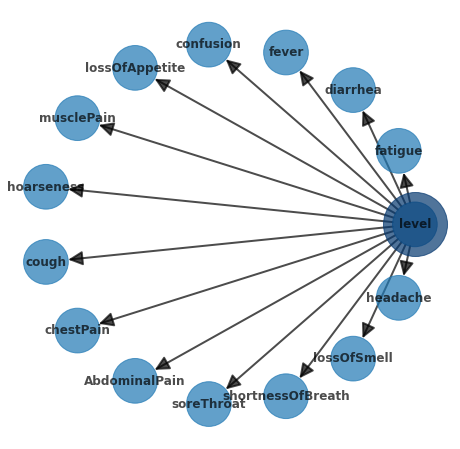

In [53]:
plt.figure(3,figsize=(8,8))
G = nx.DiGraph()
G.add_edges_from(model.edges)


G.add_nodes_from(model.nodes)
pos = nx.circular_layout(G)
DAG = G.to_directed()
nx.topological_sort(DAG)

nx.draw_networkx(G,
                 pos=pos,
                 with_labels=True,
                 node_size=[2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000],
                 arrowsize=30,
                 alpha=0.7,
                 font_weight="bold",
                 width=2.0)  # Draw the original graph

tt_g = G.subgraph(nodes=['level'])
nx.draw(tt_g, pos=pos, with_labels=False, arrowsize=0, node_size=4100, alpha=0.7, font_weight="bold", node_color='#063970')

plt.show()

### Scoring the model

#### Collect prediction accuracy scores for all variables

In [54]:
accuracy_dict = {}

for column in testing_data:
    predict_data = testing_data.copy()
    predict_data.drop(column, axis=1, inplace=True)
    y_pred = model.predict(predict_data)

    accuracy = accuracy_score(testing_data[column], y_pred)

    print(f'{column} Accuracy score: {accuracy}')

    accuracy_dict[column] = accuracy

  0%|          | 0/7700 [00:00<?, ?it/s]

headache Accuracy score: 0.71235


  0%|          | 0/7665 [00:00<?, ?it/s]

lossOfSmell Accuracy score: 0.7115


  0%|          | 0/7665 [00:00<?, ?it/s]

musclePain Accuracy score: 0.711975


  0%|          | 0/7700 [00:00<?, ?it/s]

cough Accuracy score: 0.712625


  0%|          | 0/7724 [00:00<?, ?it/s]

soreThroat Accuracy score: 0.71275


  0%|          | 0/7639 [00:00<?, ?it/s]

chestPain Accuracy score: 0.711975


  0%|          | 0/7691 [00:00<?, ?it/s]

fever Accuracy score: 0.709525


  0%|          | 0/7693 [00:00<?, ?it/s]

hoarseness Accuracy score: 0.712425


  0%|          | 0/7678 [00:00<?, ?it/s]

lossOfAppetite Accuracy score: 0.7138


  0%|          | 0/7714 [00:00<?, ?it/s]

diarrhea Accuracy score: 0.7138


  0%|          | 0/7702 [00:00<?, ?it/s]

fatigue Accuracy score: 0.713825


  0%|          | 0/7663 [00:00<?, ?it/s]

confusion Accuracy score: 0.713125


  0%|          | 0/7670 [00:00<?, ?it/s]

shortnessOfBreath Accuracy score: 0.712925


  0%|          | 0/7703 [00:00<?, ?it/s]

AbdominalPain Accuracy score: 0.716525


  0%|          | 0/12300 [00:00<?, ?it/s]

level Accuracy score: 0.999875


In [55]:
a = 0
for v in accuracy_dict.values():
    a += v

accuracy_dict['Average'] = a / len(accuracy_dict.keys())

accuracy_dict

{'headache': 0.71235,
 'lossOfSmell': 0.7115,
 'musclePain': 0.711975,
 'cough': 0.712625,
 'soreThroat': 0.71275,
 'chestPain': 0.711975,
 'fever': 0.709525,
 'hoarseness': 0.712425,
 'lossOfAppetite': 0.7138,
 'diarrhea': 0.7138,
 'fatigue': 0.713825,
 'confusion': 0.713125,
 'shortnessOfBreath': 0.712925,
 'AbdominalPain': 0.716525,
 'level': 0.999875,
 'Average': 0.7319333333333334}

#### Get structure correlation scores

In [56]:
f1 = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=f1_score,
                       return_summary=False)
acc = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05,
                        score=accuracy_score, return_summary=False)
pr = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05,
                       score=precision_score, return_summary=False)
recall = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05,
                           score=recall_score, return_summary=False)
ls = log_likelihood_score(model=model, data=testing_data)
ss = structure_score(model=model, data=testing_data, scoring_method='bdeu')

print(f'F1 score: {f1}')
print(f'Accuracy score: {acc}')
print(f'Precision score: {pr}')
print(f'Recall score: {recall}')
print(f'Log-likilihood score: {ls}')
print(f'Structure score: {ss}')

print(model.name)

F1 score: 0.0
Accuracy score: 0.9047619047619048
Precision score: 0.0
Recall score: 0.0
Log-likilihood score: -280735.9788581257
Structure score: -281322.0946482938



## Conditional Probability Table (CPT)

In [57]:
print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd * 100, '\n')

Check model: True

CPT of headache:
+-------------+-------------------+-----+----------------------+
| level       | level(0)          | ... | level(6)             |
+-------------+-------------------+-----+----------------------+
| headache(0) | 49.90413870386137 | ... | 0.003129067788124562 |
+-------------+-------------------+-----+----------------------+
| headache(1) | 50.09586129613864 | ... | 99.99687093221186    |
+-------------+-------------------+-----+----------------------+ 

CPT of lossOfSmell:
+----------------+-----+----------------------+
| level          | ... | level(6)             |
+----------------+-----+----------------------+
| lossOfSmell(0) | ... | 0.003129067788124562 |
+----------------+-----+----------------------+
| lossOfSmell(1) | ... | 99.99687093221186    |
+----------------+-----+----------------------+ 

CPT of musclePain:
+---------------+-----+----------------------+
| level         | ... | level(6)             |
+---------------+-----+-------------